In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import scipy.linalg as LA

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
plt.rcParams['text.usetex'] = True

In [64]:
fp = '../Synthetic/Hystersis/SmoothBed_SS_IC/hdf5'

files   = sorted([os.path.join(fp,file) for file in os.listdir(fp) if file.endswith('.nc') and '3000a' in file and len(file) == 42])
xarrays = []

for file in files:
    if '2.26' not in file: 
        xarrays.append(xr.open_dataset(file))

SmoothBed_SS_IC = xr.concat(xarrays, 
                       pd.Index(data = np.delete(np.arange(2.00, 2.51, 0.01),26),  name='Delta_MB'))

SmoothBed_SS_IC["H"] = SmoothBed_SS_IC.z_s - SmoothBed_SS_IC.z_b

In [73]:
fp = '../Synthetic/Hystersis/Observed_IC/hdf5'

files   = sorted([os.path.join(fp,file) for file in os.listdir(fp) if file.endswith('.nc') and '3000a' in file and len(file) == 41])
xarrays = []

for file in files:
    if '2.26' not in file: 
        xarrays.append(xr.open_dataset(file))

Observed_IC = xr.concat(xarrays, 
                       pd.Index(data = np.delete(np.arange(2.00, 2.51, 0.01),26), name='Delta_MB'))

Observed_IC["H"] = Observed_IC.z_s - Observed_IC.z_b

In [71]:
len(np.arange(2.00, 2.51, 0.01))

51

In [72]:
len(files)

50

In [74]:
Observed_IC.H.sel(t=0).integrate("x")

<xarray.DataArray 'H' (Delta_MB: 50)>
array([5945050., 5945050., 5945050., 5945050., 5945050., 5945050.,
       5945050., 5945050., 5945050., 5945050., 5945050., 5945050.,
       5945050., 5945050., 5945050., 5945050., 5945050., 5945050.,
       5945050., 5945050., 5945050., 5945050., 5945050., 5945050.,
       5945050., 5945050., 5945050., 5945050., 5945050., 5945050.,
       5945050., 5945050., 5945050., 5945050., 5945050., 5945050.,
       5945050., 5945050., 5945050., 5945050., 5945050., 5945050.,
       5945050., 5945050., 5945050., 5945050., 5945050., 5945050.,
       5945050., 5945050.])
Coordinates:
    t         float64 0.0
  * Delta_MB  (Delta_MB) float64 2.0 2.01 2.02 2.03 2.04 ... 2.47 2.48 2.49 2.5

In [75]:
SmoothBed_SS_IC.H.sel(t=0).integrate("x")

<xarray.DataArray 'H' (Delta_MB: 50)>
array([6112085.18445, 6112085.18445, 6112085.18445, 6112085.18445,
       6112085.18445, 6112085.18445, 6112085.18445, 6112085.18445,
       6112085.18445, 6112085.18445, 6112085.18445, 6112085.18445,
       6112085.18445, 6112085.18445, 6112085.18445, 6112085.18445,
       6112085.18445, 6112085.18445, 6112085.18445, 6112085.18445,
       6112085.18445, 6112085.18445, 6112085.18445, 6112085.18445,
       6112085.18445, 6112085.18445, 6112085.18445, 6112085.18445,
       6112085.18445, 6112085.18445, 6112085.18445, 6112085.18445,
       6112085.18445, 6112085.18445, 6112085.18445, 6112085.18445,
       6112085.18445, 6112085.18445, 6112085.18445, 6112085.18445,
       6112085.18445, 6112085.18445, 6112085.18445, 6112085.18445,
       6112085.18445, 6112085.18445, 6112085.18445, 6112085.18445,
       6112085.18445, 6112085.18445])
Coordinates:
    t         float64 0.0
  * Delta_MB  (Delta_MB) float64 2.0 2.01 2.02 2.03 2.04 ... 2.47 2.48 2.49 2.5

In [76]:
OIC_vol = Observed_IC.H.integrate("x") / Observed_IC.H.sel(t=0).integrate("x")
SIC_vol = SmoothBed_SS_IC.H.integrate("x") / SmoothBed_SS_IC.H.sel(t=0).integrate("x")

(0.5, 1.5)

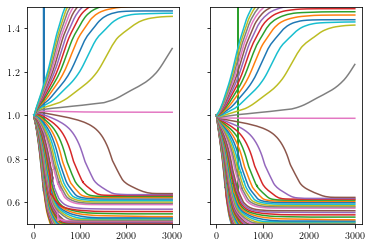

In [80]:
fig, ax = plt.subplots(1,2, sharey=True)


for delta_mb in Observed_IC.Delta_MB:
    
    ax[0].plot(OIC_vol.t, OIC_vol.sel(Delta_MB=delta_mb))
    
    
    ax[1].plot(SIC_vol.t, SIC_vol.sel(Delta_MB=delta_mb), label=delta_mb.values)

#ax[1].legend()
ax[1].set_ylim(0.5, 1.5)

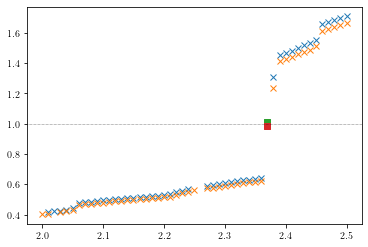

In [90]:
plt.plot(OIC_vol.Delta_MB, OIC_vol.isel(t=-1), 'x')
plt.plot(SIC_vol.Delta_MB, SIC_vol.isel(t=-1), 'x')


plt.plot(OIC_vol.isel(Delta_MB=36).Delta_MB, OIC_vol.isel(Delta_MB=36).isel(t=-1), 's')
plt.plot(SIC_vol.isel(Delta_MB=36).Delta_MB, SIC_vol.isel(Delta_MB=36).isel(t=-1), 's')

plt.axhline(1.0, ls=':', c='k', lw=0.5)

In [113]:
10e-7

1e-06

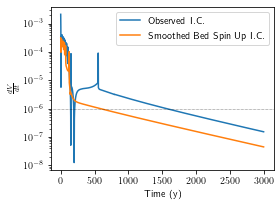

In [115]:
fig, ax = plt.subplots(1,1, figsize=(4,3))

ax.plot(OIC_vol.t, np.abs(OIC_vol.isel(Delta_MB=36).differentiate('t')), label='Observed I.C.')
ax.plot(SIC_vol.t, np.abs(SIC_vol.isel(Delta_MB=36).differentiate('t')), label='Smoothed Bed Spin Up I.C.')
ax.legend()


ax.set_ylabel(r'$\frac{dV}{dt}$')
ax.set_xlabel('Time (y)')

ax.axhline(10e-7, ls=':', c='k', lw=0.5)
ax.set_yscale('log')

fig.savefig('/Users/andrewnolan/Desktop/test.png', dpi=600, bbox_inches='tight', facecolor='w')

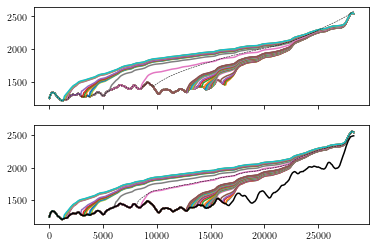

In [79]:
fig, ax = plt.subplots(2,1, sharey=True, sharex=True)


for delta_mb in Observed_IC.Delta_MB:
    
    ax[0].plot(Observed_IC.x, Observed_IC.isel(t=-1).sel(Delta_MB=delta_mb).z_s)
    
    
    ax[1].plot(SmoothBed_SS_IC.x, SmoothBed_SS_IC.isel(t=-1).sel(Delta_MB=delta_mb).z_s)
    
    
ax[0].plot(Observed_IC.x,      Observed_IC.isel(t=-1,Delta_MB=0).z_b, 'k')
ax[0].plot(Observed_IC.x,      Observed_IC.isel(t=0,Delta_MB=0).z_s, c='k', ls='--', lw=0.5)

ax[1].plot(SmoothBed_SS_IC.x,  SmoothBed_SS_IC.isel(t=-1,Delta_MB=0).z_b, 'k')
ax[1].plot(SmoothBed_SS_IC.x,  SmoothBed_SS_IC.isel(t=0, Delta_MB=0).z_s, c='k', ls='--', lw=0.5)

<BarContainer object of 50 artists>

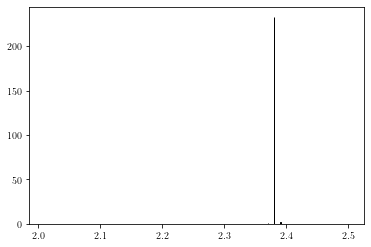

In [81]:
plt.bar(SmoothBed_SS_IC.Delta_MB, np.linalg.norm((Observed_IC.isel(t=-1).z_s - SmoothBed_SS_IC.isel(t=-1).z_s).values, 2, axis=1), width=0.001, edgecolor='k')

In [3]:
import glob 

beds = glob.glob('../Data/Topography/pert_R_0.01_harmonics_1-10.dat')
beds.sort()

In [4]:
beds

['../Data/Topography/pert_R_0.01_harmonics_1-10.dat']

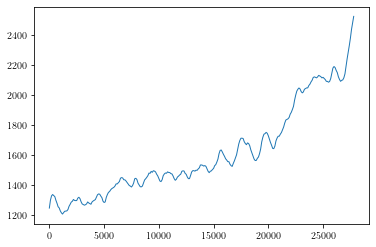

In [6]:
for bed_fp in beds:
    plt.plot(np.loadtxt(bed_fp)[:,0], np.loadtxt(bed_fp)[:,1], lw=1)
    
# #plt.plot(SmoothBed_SS_IC.x,  SmoothBed_SS_IC.isel(t=-1,Delta_MB=0).z_b, 'k')

# plt.savefig('/Users/andrewnolan/Desktop/Test.png', dpi=600, bbox_inches='tight', facecolor='w')

In [7]:
np.loadtxt(bed_fp)[-1,0]

27800.0

In [146]:
SmoothBed_SS_IC.isel(t=-1,Delta_MB=0).z_b - np.loadtxt(bed_fp)[:,1]

<xarray.DataArray 'z_b' (x: 284)>
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Coordinates:
    t         float64 3e+03
  * x         (x) float64 0.0 100.0 200.0 300.0 ... 2.81e+04 2.82e+04 2.83e+04
    Delta_MB  float64 2.0

In [141]:
np.loadtxt('../Data/Topography/pert_R_0.01_harmonics_1-10.dat')[:,1] -  np.loadtxt(bed_fp)[:,1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.